In [5]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook
# offline plotly
from plotly.offline import plot, iplot


### Base de datos

In [6]:
variables= pd.read_csv('Datos/dnixradiocindivxfila.csv', index_col = 'dni')

In [7]:
variables.head()

,años,target,personasxvivienda,Area_RC,Pje_Total_BP_en_RC,Porcentaje_de_hogares_con_conexion_a_red,%conaccesoredgas,%dehogarescnib,%conaccesoredeagua,connivelsec,...,sit_max,sit_min,sit_last,sit_first,pct_mean,pct_max,pct_min,pct_std,pct_var,pct_last
dni,,,,,,,,,,,,,,,,,,,,,
8863,95.0,1.0,2.932735,57051.814647,0.00,50.22,95.20,0.00,100.00,50.22,...,1,0,1,1,NaN,NaN,-100.0,0.000000,0.000000,NaN
9394,85.0,1.0,3.214035,154392.387052,0.70,94.83,63.64,20.54,99.66,51.07,...,1,1,1,1,-0.872599,0.694444,-4.0,1.522846,2.319058,-4.000000
9411,84.0,1.0,3.287081,38329.211557,0.00,71.19,96.16,2.93,99.27,42.73,...,1,0,1,1,NaN,NaN,-100.0,0.000000,0.000000,0.000000
48754,93.0,1.0,3.608150,134974.633728,0.47,90.70,60.23,10.09,99.71,56.46,...,1,0,1,1,NaN,NaN,-100.0,0.000000,0.000000,NaN
51230,89.0,1.0,2.621469,112628.012503,0.00,100.00,90.41,11.23,99.45,39.88,...,1,0,1,1,NaN,NaN,-100.0,0.000000,0.000000,-12.195122


In [8]:
# quitamos del archivo la columna con el label target.
X=variables.drop(columns=['target'])
# por otro lado armamos el arhivo con los resultados
y=variables.target

In [9]:
from sklearn.model_selection import train_test_split
X, X_testFINAL, y, y_testFINAL = train_test_split(X,y, test_size=6000, random_state=5)
print('Train shape: ', X.shape)
print('Test shape: ', X_testFINAL.shape)

Train shape:  (63636, 39)
Test shape:  (6000, 39)


In [10]:
X_testFINAL.to_csv('xtest.csv')
y_testFINAL.to_csv('ytest.csv', header={'dni', 'convierte'})

### 1.Matriz de correlación

In [11]:
corr = variables.corr()
trace = go.Heatmap(z=corr.values.tolist(), x=corr.columns, y=corr.columns)
data=[trace]
layout = go.Layout(
    title='Heatmap de correlación entre las variables',
    autosize=True,
    width=850,
    height=700,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=30),
    margin=go.layout.Margin(l=0, r=200, b=200, t=80)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap1')

### 2.Correlación con  la variable Target


In [12]:
correlations_target = corr.sort_values('target')['target']
# Most negative correlations
correlations_target.head(15)

sit_mean             -0.674818
sit_max              -0.672357
sit_last             -0.581654
sit_first            -0.265323
sit_min              -0.241668
pct_min              -0.153630
pmuybajo             -0.129327
%dehogarescnib       -0.120621
malacmateriales      -0.117519
personasxvivienda    -0.108808
Pje_Total_BP_en_RC   -0.088078
pbajo                -0.086698
connivelsec          -0.060918
Area_RC              -0.031753
genero_M             -0.005241
Name: target, dtype: float64

In [13]:
# Most positive correlations
correlations_target.dropna().tail(10)


monto_std           0.060582
monto_mean          0.062915
pmedioalto          0.104990
palto               0.109258
cestudiosuper       0.111079
cal1                0.117519
%conaccesoredgas    0.123641
años                0.178899
antiguedadmeses     0.347325
target              1.000000
Name: target, dtype: float64

### 3.Correlacion entre las variables

In [14]:
threshold = 0.7

correlated_pairs = {}

# Iterate through the columns
for col in corr:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in list(corr.index[corr[col] > threshold]) if x != col]
    correlated_pairs[col] = above_threshold_vars

In [15]:
correlated_pairs

{'años': [],
 'target': [],
 'personasxvivienda': [],
 'Area_RC': [],
 'Pje_Total_BP_en_RC': ['malacmateriales'],
 'Porcentaje_de_hogares_con_conexion_a_red': [],
 '%conaccesoredgas': ['cal1', 'palto'],
 '%dehogarescnib': ['malacmateriales', 'pmuybajo'],
 '%conaccesoredeagua': [],
 'connivelsec': ['pbajo'],
 'cestudiosuper': [],
 'cal1': ['%conaccesoredgas'],
 'malacmateriales': ['Pje_Total_BP_en_RC', '%dehogarescnib', 'pmuybajo'],
 'palto': ['%conaccesoredgas'],
 'pmedioalto': [],
 'pbajo': ['connivelsec'],
 'pmuybajo': ['%dehogarescnib', 'malacmateriales'],
 'genero_F': [],
 'genero_M': [],
 'genero_nan': [],
 'antiguedadmeses': [],
 'monto_mean': ['monto_sum', 'monto_std'],
 'monto_max': ['monto_std'],
 'monto_sum': ['monto_mean', 'monto_std'],
 'monto_min': [],
 'monto_std': ['monto_mean', 'monto_max', 'monto_sum'],
 'monto_last': [],
 'monto_first': [],
 'codent_nunique': [],
 'sit_mean': [],
 'sit_max': [],
 'sit_min': [],
 'sit_last': [],
 'sit_first': [],
 'pct_mean': ['pct_max

In [16]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper.head()

,años,target,personasxvivienda,Area_RC,Pje_Total_BP_en_RC,Porcentaje_de_hogares_con_conexion_a_red,%conaccesoredgas,%dehogarescnib,%conaccesoredeagua,connivelsec,...,sit_max,sit_min,sit_last,sit_first,pct_mean,pct_max,pct_min,pct_std,pct_var,pct_last
años,NaN,0.178899,-0.064862,-0.022026,-0.064232,0.026930,0.065361,-0.065383,0.025026,-0.004978,...,-0.135913,-0.034992,-0.137979,0.033960,-0.032764,-0.015848,-0.091950,-0.002473,-0.003248,-0.019926
target,NaN,NaN,-0.108808,-0.031753,-0.088078,0.046643,0.123641,-0.120621,0.038828,-0.060918,...,-0.672357,-0.241668,-0.581654,-0.265323,0.053434,0.043057,-0.153630,0.025228,0.003476,0.033056
personasxvivienda,NaN,NaN,NaN,0.210079,0.325891,-0.253463,-0.601693,0.519637,-0.139725,0.379066,...,0.128580,0.018315,0.075136,0.025022,-0.022392,-0.019224,0.033013,-0.015686,-0.004570,-0.010215
Area_RC,NaN,NaN,NaN,NaN,0.018348,-0.169052,-0.330947,0.299614,-0.177950,0.131153,...,0.027796,0.007753,0.020647,0.002142,-0.008553,-0.007546,0.016287,-0.005165,-0.001047,-0.006443
Pje_Total_BP_en_RC,NaN,NaN,NaN,NaN,NaN,-0.083826,-0.650295,0.546823,-0.111277,0.249606,...,0.101260,0.011192,0.064182,0.012292,-0.011207,-0.008502,0.029520,-0.008076,-0.001649,-0.003605


In [17]:
#selecciono las variables que se encuentran correlacionadas por enciama del límite
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Se pueden remover %d columnas.' % (len(to_drop)))

Se pueden remover 10 columnas.


In [18]:
to_drop

['cal1',
 'malacmateriales',
 'palto',
 'pbajo',
 'pmuybajo',
 'monto_sum',
 'monto_std',
 'pct_max',
 'pct_std',
 'pct_var']

In [19]:
X = X.drop(columns = to_drop)


### 4. Modelo para desechar las variables sin importancia

In [20]:
from sklearn.model_selection import train_test_split
folds=10
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=folds, random_state=None)

import lightgbm as lgb
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(3):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

feature_importances = feature_importances/3
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)


[200]	valid_0's auc: 0.993297	valid_0's binary_logloss: 0.0884231


In [21]:
feature_importances.head(15)

,feature,importance
21,sit_mean,299.666667
20,codent_nunique,213.666667
18,monto_last,184.333333
16,monto_max,174.666667
0,años,174.333333
24,sit_last,170.666667
14,antiguedadmeses,137.333333
19,monto_first,134.666667
15,monto_mean,130.000000
22,sit_max,128.333333


In [22]:
# variables con cero importancia
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('Hay %d variables con 0.0 importancia' % len(zero_features))
feature_importances.tail(12)

Hay 1 variables con 0.0 importancia


,feature,importance
7,%conaccesoredeagua,48.333333
6,%dehogarescnib,46.333333
8,connivelsec,46.000000
5,%conaccesoredgas,41.333333
26,pct_mean,39.000000
17,monto_min,29.333333
11,genero_F,21.666667
25,sit_first,20.666667
3,Pje_Total_BP_en_RC,8.666667
12,genero_M,1.666667


In [23]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 30 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 12
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['importance_normalized'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['feature'].head(30))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

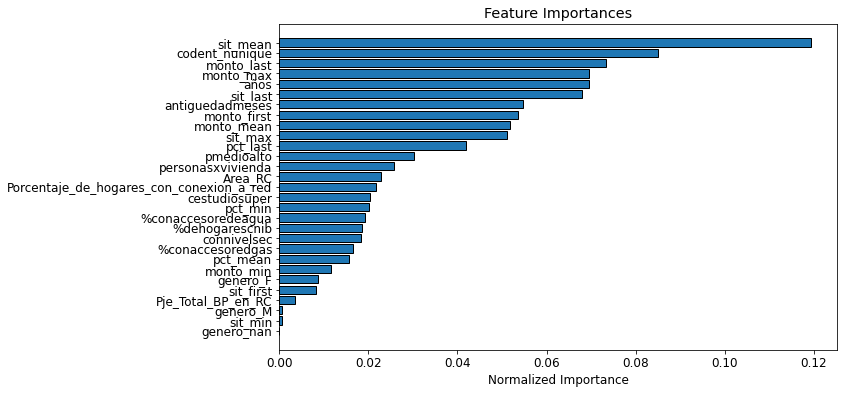

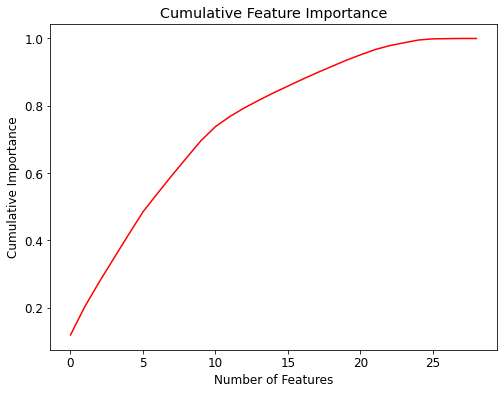

19 features required for 0.90 of cumulative importance


In [24]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [25]:
#descartamos las variables
X = X.drop(columns = zero_features)

print('Training shape: ', X.shape)



Training shape:  (63636, 28)


In [26]:
#JUNTAMOS X E Y
X=X.merge(y, how='outer',left_index=True, right_index=True)

In [27]:
X.shape

(63636, 29)

In [28]:
X.to_csv('Datos/datos_c_seleccion.csv')